<a href="https://colab.research.google.com/github/GadeMounika8/ML_model_building_on_datasets/blob/main/ML_Model_Building_on_Diamond_dataset_Approach_2_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing all required Libraries



In [2]:
#importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the Diamonds Dataset

In [3]:
# reading the csv file
df = pd.read_csv(r"/content/drive/MyDrive/DIAMONDS.csv")
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...,...
48321,53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
48322,53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
48323,53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
48324,53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
#Top 5 records
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [5]:
#gives number of rows and columns
df.shape

(48326, 11)

In [6]:
#displays all the column names
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [7]:
#shows number of rows
df.index

RangeIndex(start=0, stop=48326, step=1)

In [8]:
#rearranging the dataframe
newdf = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table','x', 'y', 'z', 'price']]
newdf.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
3,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
4,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48,336


#Step-1:
#Identifying the input variables(X) and Target Variables(y)

In [9]:
y = newdf['price']
X = newdf[['carat', 'cut', 'color', 'clarity', 'depth', 'table','x', 'y', 'z']]

#Step-2:
#Split the Data into Train Data and Test Data

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 82)

In [11]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
38379,0.54,Very Good,G,SI1,62.8,59.0,5.14,5.18,3.24
5788,0.90,Good,G,VS2,62.1,59.0,6.02,6.16,3.78
16214,1.33,Ideal,I,VS2,62.5,54.0,7.02,7.05,4.40
7593,0.83,Ideal,F,VS2,62.3,56.0,5.99,6.02,3.74
19384,1.19,Ideal,G,VVS2,60.8,55.0,6.91,6.90,4.19


In [12]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(33828, 9) (33828,)
(14498, 9) (14498,)


In [13]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
38379,0.54,Very Good,G,SI1,62.8,59.0,5.14,5.18,3.24
5788,0.90,Good,G,VS2,62.1,59.0,6.02,6.16,3.78
16214,1.33,Ideal,I,VS2,62.5,54.0,7.02,7.05,4.40
7593,0.83,Ideal,F,VS2,62.3,56.0,5.99,6.02,3.74
19384,1.19,Ideal,G,VVS2,60.8,55.0,6.91,6.90,4.19


In [14]:
X_train.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

In [15]:
X_train_cat = X_train.select_dtypes(include = ['object'])
X_train_cat.head()

,cut,color,clarity
38379,Very Good,G,SI1
5788,Good,G,VS2
16214,Ideal,I,VS2
7593,Ideal,F,VS2
19384,Ideal,G,VVS2


In [16]:
X_train_num = X_train.select_dtypes(include =['float64'])
X_train_num.head()

,carat,depth,table,x,y,z
38379,0.54,62.8,59.0,5.14,5.18,3.24
5788,0.90,62.1,59.0,6.02,6.16,3.78
16214,1.33,62.5,54.0,7.02,7.05,4.40
7593,0.83,62.3,56.0,5.99,6.02,3.74
19384,1.19,60.8,55.0,6.91,6.90,4.19


#Step-3:
#Data Preparation of Train Data using Standardization technique for Numerical Variables and Label Encoding technique for Categorical Variables
#Data Preprocessing of Numerical Variables of Train Data using Standardization Technique

In [17]:
from sklearn.preprocessing import StandardScaler
StandardScaler_object = StandardScaler()

In [18]:
X_train_num_rescaled = pd.DataFrame(StandardScaler_object.fit_transform(X_train_num), columns = X_train_num.columns, index = X_train_num.index)
X_train_num_rescaled.head()

,carat,depth,table,x,y,z
38379,-0.493779,0.940196,0.880238,-0.455812,-0.423765,-0.356900
5788,0.423627,0.279314,0.880238,0.411582,0.547492,0.503966
16214,1.519417,0.656960,-1.605652,1.397256,1.429552,1.492369
7593,0.245242,0.468137,-0.611296,0.382011,0.408741,0.440198
19384,1.162648,-0.948038,-1.108474,1.288831,1.280890,1.157587


In [19]:
X_train_num.describe()

,carat,depth,table,x,y,z
count,33828.000000,33828.000000,33828.000000,33828.000000,33828.000000,33828.000000
mean,0.733764,61.804153,57.229532,5.602436,5.607580,3.463875
std,0.392417,1.059207,2.011382,1.014549,1.009017,0.627284
min,0.200000,59.100000,52.000000,3.730000,3.680000,1.530000
25%,0.380000,61.200000,56.000000,4.670000,4.680000,2.880000
50%,0.700000,61.900000,57.000000,5.600000,5.600000,3.460000
75%,1.020000,62.500000,59.000000,6.450000,6.460000,4.000000
max,1.990000,64.500000,63.000000,8.200000,8.210000,5.050000


In [20]:
print("no:of numerical features:",StandardScaler_object.n_features_in_)
print("Mean of each column:", StandardScaler_object.mean_)
print("Standard deviation of each column:", np.sqrt(StandardScaler_object.var_))

no:of numerical features: 6
Mean of each column: [ 0.73376434 61.80415336 57.22953175  5.60243644  5.60757952  3.4638746 ]
Standard deviation of each column: [0.39241077 1.05919102 2.01135183 1.01453415 1.00900194 0.62727477]


#Data Preprocessing of Categorical Variables of Train Data using Label Encoding Technique

In [21]:
X_train_cat['color'].value_counts(normalize = True)

G    0.216655
E    0.186384
F    0.178846
H    0.150201
D    0.129035
I    0.092911
J    0.045968
Name: color, dtype: float64

In [22]:
X_train_cat['cut'].value_counts(normalize = True)

Ideal        0.434344
Premium      0.254612
Very Good    0.230342
Good         0.076534
Fair         0.004168
Name: cut, dtype: float64

In [23]:
X_train_cat['clarity'].value_counts(normalize = True)

SI1     0.241161
VS2     0.231465
VS1     0.158567
SI2     0.150585
VVS2    0.099917
VVS1    0.072957
IF      0.035917
I1      0.009430
Name: clarity, dtype: float64

In [24]:
X_train_cat_le = pd.DataFrame(index = X_train_cat.index)
X_train_cat_le.head()

""
38379
5788
16214
7593
19384


In [25]:
cut_label_encoder = {'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}
X_train_cat_le['cut'] = X_train_cat['cut'].apply(lambda x: cut_label_encoder[x])
X_train_cat_le.head()

,cut
38379,3
5788,2
16214,5
7593,5
19384,5


In [26]:
X_train_cat.cut.unique()

array(['Very Good', 'Good', 'Ideal', 'Premium', 'Fair'], dtype=object)

In [27]:
X_train_cat.cut.nunique()

5

In [28]:
X_train_cat.color.unique()

array(['G', 'I', 'F', 'E', 'D', 'H', 'J'], dtype=object)

In [29]:
X_train_cat.color.nunique()

7

In [30]:
X_train_cat.clarity.unique()

array(['SI1', 'VS2', 'VVS2', 'VS1', 'SI2', 'IF', 'VVS1', 'I1'],
      dtype=object)

In [31]:
X_train_cat.clarity.nunique()

8

In [32]:
color_label_encoder = {'J':1, 'I':1, 'H':1, 'G':1, 'F':2, 'E':2, 'D':2}
X_train_cat_le['color'] = X_train_cat['color'].apply(lambda x:color_label_encoder[x])
X_train_cat_le.head()

,cut,color
38379,3,1
5788,2,1
16214,5,1
7593,5,2
19384,5,1


In [33]:
clarity_label_encoder = {'I1':1, 'SI2':2, 'SI1':2, 'VS2':3, 'VS1':3, 'VVS2':4, 'VVS1':4, 'IF':5}
X_train_cat_le['clarity'] = X_train_cat['clarity'].apply(lambda x: clarity_label_encoder[x])
X_train_cat_le.head()

,cut,color,clarity
38379,3,1,2
5788,2,1,3
16214,5,1,3
7593,5,2,3
19384,5,1,4


#Concatenating the Numerical Variables and Categorical Variables of Train Data

In [34]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_le], axis = 1)
X_train_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
38379,-0.493779,0.940196,0.880238,-0.455812,-0.423765,-0.356900,3,1,2
5788,0.423627,0.279314,0.880238,0.411582,0.547492,0.503966,2,1,3
16214,1.519417,0.656960,-1.605652,1.397256,1.429552,1.492369,5,1,3
7593,0.245242,0.468137,-0.611296,0.382011,0.408741,0.440198,5,2,3
19384,1.162648,-0.948038,-1.108474,1.288831,1.280890,1.157587,5,1,4


#Step-4:
#Building a Model using Linear Regression Algorithm

In [35]:
from sklearn.linear_model import LinearRegression
LR_regressor_object = LinearRegression()
LR_regressor_object.fit(X_train_transformed, y_train)

LinearRegression()

#Step-5:
#Data Preprocessing on Test Data

In [36]:
X_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
19604,1.51,Ideal,H,SI1,62.4,57.0,7.30,7.34,4.57
35074,0.30,Very Good,G,VS2,62.6,62.0,4.21,4.25,2.65
670,0.33,Premium,F,SI2,63.0,58.0,4.42,4.40,2.78
14962,1.02,Very Good,E,VS2,63.2,60.0,6.34,6.29,3.99
366,0.29,Very Good,E,VS1,62.4,55.0,4.20,4.25,2.63


In [37]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14498 entries, 19604 to 15981
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    14498 non-null  float64
 1   cut      14498 non-null  object 
 2   color    14498 non-null  object 
 3   clarity  14498 non-null  object 
 4   depth    14498 non-null  float64
 5   table    14498 non-null  float64
 6   x        14498 non-null  float64
 7   y        14498 non-null  float64
 8   z        14498 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.1+ MB


In [38]:
X_test_cat = X_test.select_dtypes(include = 'object')
X_test_cat.head()

,cut,color,clarity
19604,Ideal,H,SI1
35074,Very Good,G,VS2
670,Premium,F,SI2
14962,Very Good,E,VS2
366,Very Good,E,VS1


In [39]:
X_test_num =X_test.select_dtypes(include = 'float64')
X_test_num.head()

,carat,depth,table,x,y,z
19604,1.51,62.4,57.0,7.30,7.34,4.57
35074,0.30,62.6,62.0,4.21,4.25,2.65
670,0.33,63.0,58.0,4.42,4.40,2.78
14962,1.02,63.2,60.0,6.34,6.29,3.99
366,0.29,62.4,55.0,4.20,4.25,2.63


#Data Preparation of Numerical Variables of Test Data using Standardization Technique

In [40]:
X_test_num_rescaled = pd.DataFrame(StandardScaler_object.transform(X_test_num), columns = X_test_num.columns, index = X_test_num.index)
X_test_num_rescaled.head()

,carat,depth,table,x,y,z
19604,1.978120,0.562549,-0.114118,1.673244,1.716964,1.763383
35074,-1.105383,0.751372,2.371772,-1.372488,-1.345468,-1.297477
670,-1.028933,1.129019,0.383060,-1.165497,-1.196806,-1.090231
14962,0.729429,1.317842,1.377416,0.726997,0.676332,0.838748
366,-1.130867,0.562549,-1.108474,-1.382345,-1.345468,-1.329361


#Data Preprocessing of Categorical Variables of Test Data using Label Encoding Technique

In [41]:
X_test_cat_le = pd.DataFrame(index = X_test_cat.index)
X_test_cat_le.head()

""
19604
35074
670
14962
366


In [42]:
X_test_cat_le['cut'] = X_test_cat['cut'].apply(lambda x: cut_label_encoder[x])
X_test_cat_le['color'] = X_test_cat['color'].apply(lambda x: color_label_encoder[x])
X_test_cat_le['clarity'] = X_test_cat['clarity'].apply(lambda x: clarity_label_encoder[x])
X_test_cat_le.head()

,cut,color,clarity
19604,5,1,2
35074,3,1,3
670,4,2,2
14962,3,2,3
366,3,2,3


#Concatenating the Numerical Variables and Categorical Variables of Test Data

In [43]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_le], axis = 1)
X_test_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
19604,1.978120,0.562549,-0.114118,1.673244,1.716964,1.763383,5,1,2
35074,-1.105383,0.751372,2.371772,-1.372488,-1.345468,-1.297477,3,1,3
670,-1.028933,1.129019,0.383060,-1.165497,-1.196806,-1.090231,4,2,2
14962,0.729429,1.317842,1.377416,0.726997,0.676332,0.838748,3,2,3
366,-1.130867,0.562549,-1.108474,-1.382345,-1.345468,-1.329361,3,2,3


#Step-6:
#Predictions on Test Data

In [44]:
y_test_pred = LR_regressor_object.predict(X_test_transformed)
tem_df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_test_pred})
tem_df.head()

,Actual Values,Predicted Values
19604,9569,9582.278855
35074,491,-183.879546
670,557,-98.564718
14962,6580,5979.543551
366,555,805.756802


<Axes: xlabel='price', ylabel='Count'>

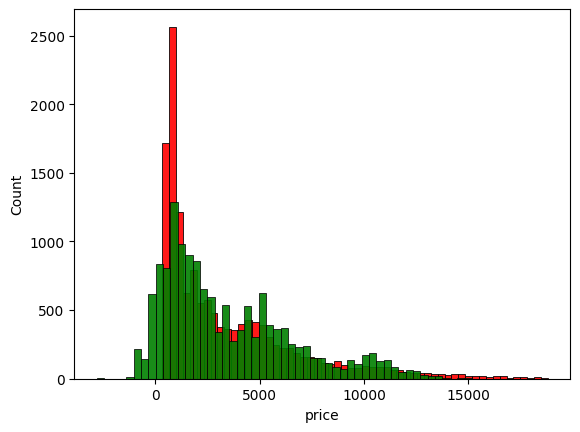

In [45]:
sns.histplot(y_test, color = 'red', alpha = 0.9)
sns.histplot(y_test_pred, color = 'green', alpha = 0.9)

#Step-7:
#Evaluation of Test Data

In [46]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 754.0007525994052
Mean Squared Error: 1282026.574356277
Root Mean Squared Error: 1132.2661234693358


#Building a Model using KNN Regressor Algorithm

In [47]:
from sklearn.neighbors import KNeighborsRegressor
KNN_regressor_object = KNeighborsRegressor()
KNN_regressor_object.fit(X_train_transformed, y_train)

KNeighborsRegressor()

#Predictions on Test Data

In [48]:
y_test_prediction = KNN_regressor_object.predict(X_test_transformed)
temp_df =pd.DataFrame({'Actual Values': y_test, 'Predicted Values':y_test_prediction})
temp_df.head()

,Actual Values,Predicted Values
19604,9569,8524.2
35074,491,651.0
670,557,667.8
14962,6580,6826.0
366,555,606.4


<Axes: xlabel='price', ylabel='Count'>

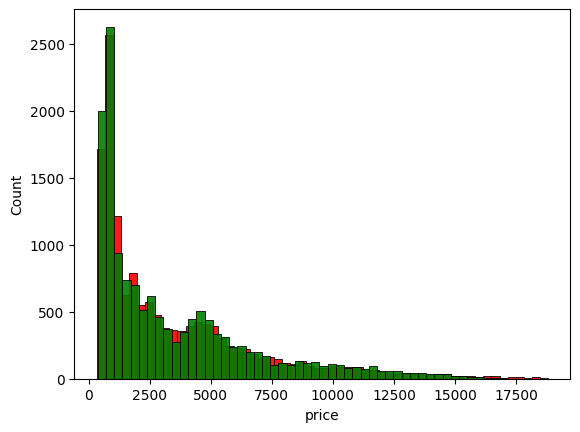

In [49]:
sns.histplot(y_test, color = 'red', alpha = 0.9)
sns.histplot(y_test_prediction, color = 'green', alpha = 0.9)

#Evaluation of Test Data

In [50]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_test_prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_prediction))
print('Root Mean Squared Error:', np.sqrt(y_test, y_test_prediction))

Mean Absolute Error: 451.1338115602152
Mean Squared Error: 697106.4324844806
Root Mean Squared Error: 19604     97.821266
35074     22.158520
670       23.600847
14962     81.117199
366       23.558438
            ...    
8384      67.705244
22491    116.606175
47385     50.892043
19391     96.907172
15981     84.113019
Name: price, Length: 14498, dtype: float64


#Model Building By Using Decision Tree Algorithm


In [51]:
from sklearn.tree import DecisionTreeRegressor
DT_regressor_object = DecisionTreeRegressor()
DT_regressor_object.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

#Predictions on Text Data

In [52]:
y_test_prediction = DT_regressor_object.predict(X_test_transformed)

#Creating DataFrame contains y_test and y_test_prediction values

In [53]:
temp_df = pd.DataFrame({'Actual values':y_test, 'predicted values':y_test_prediction})
temp_df.head()

,Actual values,predicted values
19604,9569,11917.0
35074,491,394.0
670,557,631.0
14962,6580,6389.0
366,555,614.0


#Graphical representation of Test Data

<Axes: xlabel='price', ylabel='Count'>

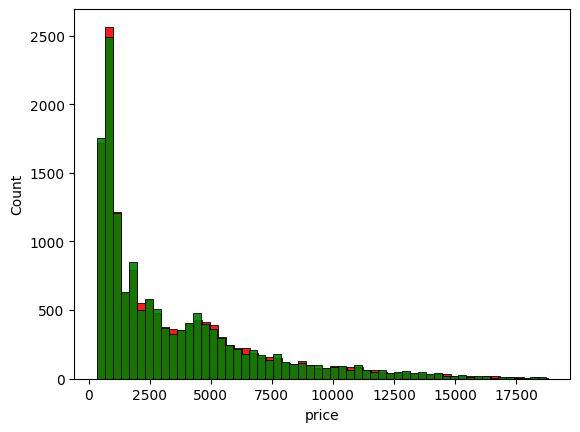

In [54]:
sns.histplot(y_test, color = 'red', alpha = 0.9)
sns.histplot(y_test_prediction, color = 'green', alpha = 0.9)

#Evaluation of Test Data

In [55]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_prediction)))

Mean Absolute Error: 522.495528118821
Mean Squared Error: 1035524.7202391902
Root Mean Squared Error: 1017.6073507199081


#Model Building by using Random Forest Algorithm

In [56]:
from sklearn.ensemble import RandomForestRegressor
RF_regressor_object = RandomForestRegressor()
RF_regressor_object.fit(X_train_transformed, y_train)

RandomForestRegressor()

#Predictions on Test Data

In [57]:
y_test_prediction = RF_regressor_object.predict(X_test_transformed)

#Creating a DataFrame consists of y_test and y_test_prediction values

In [58]:
temp_df = pd.DataFrame({'Actual values':y_test, 'predicted values':y_test_prediction})
temp_df.head()

,Actual values,predicted values
19604,9569,9500.30
35074,491,501.71
670,557,600.85
14962,6580,6689.01
366,555,493.97


<Axes: xlabel='price', ylabel='Count'>

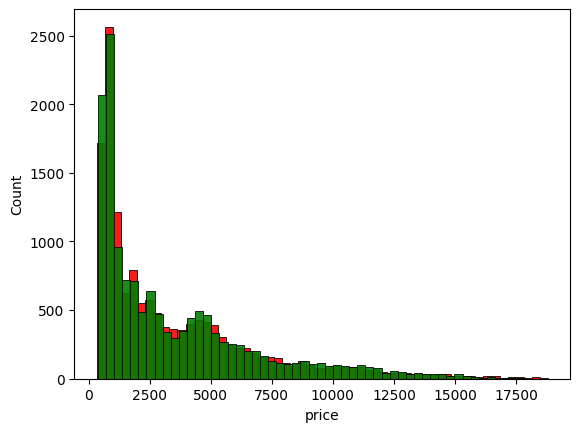

In [59]:
sns.histplot(y_test, color = 'red', alpha = 0.9)
sns.histplot(y_test_prediction, color = 'green', alpha = 0.9)

#Evaluation of Test Data

In [60]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_prediction)))

Mean Absolute Error: 402.8696113859164
Mean Squared Error: 565211.4083555238
Root Mean Squared Error: 751.8054325126441
